In [2]:
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM, Bidirectional
from keras.models import Sequential
import yfinance as yf

In [147]:
df = yf.download("AAPL", start="2020-01-01", end="2025-06-20")

[*********************100%***********************]  1 of 1 completed


In [21]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [148]:
df = df [['Close','Open']]

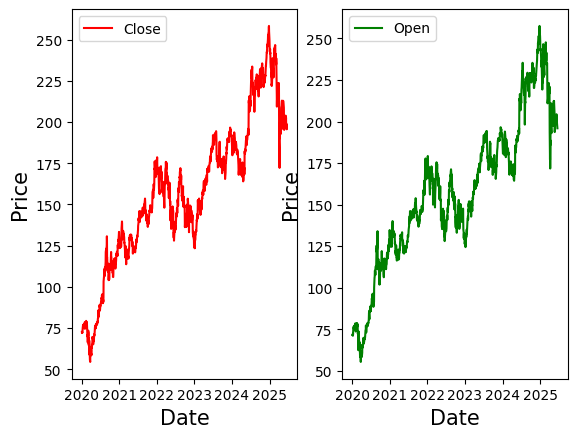

In [23]:
fig, ax = plt.subplots(1,2)
ax[0].plot(df['Close'], label = 'Close', color = 'red')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Open'], label = 'Open', color = 'green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

In [149]:
# Normalising 
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head()

Price,Close,Open
Ticker,AAPL,AAPL
Date,,
2020-01-02,0.089415,0.080821
2020-01-03,0.085954,0.081909
2020-01-06,0.088763,0.077893
2020-01-07,0.087092,0.085124
2020-01-08,0.092781,0.081921


In [150]:
train_len = int(np.round(0.7*len(df)))
train_data = df.iloc[:train_len]
test_data = df.iloc[train_len:]

In [28]:
train_data.iloc[1]

Price  Ticker
Close  AAPL      0.085954
Open   AAPL      0.081909
Name: 2020-01-03 00:00:00, dtype: float64

In [139]:
# Creating a function which takes first 50 elements as a sequence and takes the 51st elemnt as the label
def create_sequence (data) :
    sequence = []
    label = []
    start_index = 0
    for stop_index in range (100, len(data)) :
        sequence.append(data.iloc[start_index : stop_index ])
        label.append(data.iloc[stop_index])
        start_index += 1
    return(np.array(sequence), np.array (label))


In [140]:
test_seq, test_label = create_sequence(test_data)
train_seq, train_label = create_sequence(train_data)

In [141]:
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
model.fit(train_seq, train_label, validation_data=(test_seq, test_label), epochs=100, verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0618 - mean_absolute_error: 0.1931 - val_loss: 0.0051 - val_mean_absolute_error: 0.0595
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0024 - mean_absolute_error: 0.0405 - val_loss: 0.0068 - val_mean_absolute_error: 0.0707
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0013 - mean_absolute_error: 0.0298 - val_loss: 0.0056 - val_mean_absolute_error: 0.0637
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0012 - mean_absolute_error: 0.0274 - val_loss: 0.0042 - val_mean_absolute_error: 0.0537
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 9.9423e-04 - mean_absolute_error: 0.0258 - val_loss: 0.0037 - val_mean_absolute_error: 0.0499
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0010 - mean_absolute_error: 0.0253 - val_loss: 0.0038 - val_mean_absolute_error: 0.0511
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0011 - mean_absolute_error:

In [143]:
model.predict(test_seq[0:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.58599293, 0.58299136],
       [0.58447415, 0.58186173]], dtype=float32)

In [183]:
df_predicted = pd.DataFrame(np.nan, index = df.index[-50:], columns=['Close', 'Open'] )


In [184]:
# def fill_predictions (prediction_dataframe, original_dataframe, start_index) :
#     loop_index = start_index
#     k = 0
#     for stop_index in range (start_index+50, len(original_dataframe)):
#         sequence = np.array(original_dataframe.iloc[loop_index:stop_index])
#         reshaped = sequence.reshape(-1,50,2)
#         prediction_dataframe.iloc[k] = model.predict(reshaped)
#         loop_index += 1
#         k += 1

def fill_predictions (prediction_dataframe, original_dataframe, start_index) :
    loop_index = start_index
    k = 0
    for stop_index in range (start_index+100, len(original_dataframe)):
        sequence = np.array(original_dataframe.iloc[loop_index:stop_index])
        reshaped = sequence.reshape(-1,100,2)
        prediction_dataframe.iloc[k] = model.predict(reshaped)
        loop_index += 1
        k += 1

# def fill_predictions (prediction_dataframe, original_dataframe, start_index) :
#     loop_index = start_index
#     k = 0
#     for stop_index in range (start_index+50, len(original_dataframe)):
#         prediction_dataframe.iloc[k] = model.predict(original_dataframe.iloc[loop_index:stop_index])
#         loop_index += 1
#         k += 1



In [185]:
start_index = int(len(df) -150)
fill_predictions(df_predicted, df, start_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

In [154]:
df_predicted.head()

,Close,Open
Date,,
2025-04-08,0.631731,0.638107
2025-04-09,0.595723,0.601477
2025-04-10,0.598773,0.601616
2025-04-11,0.625323,0.625032
2025-04-14,0.657574,0.654409


In [186]:
df_predicted.columns = ['Predicted Close', 'Predicted Open']

In [187]:
df_merge = pd.concat([df.iloc[-50:].copy(), df_predicted], axis = 1)

In [188]:
df_merge.columns= ['Close', 'Open', 'Predicted Close', 'Predicted Open']

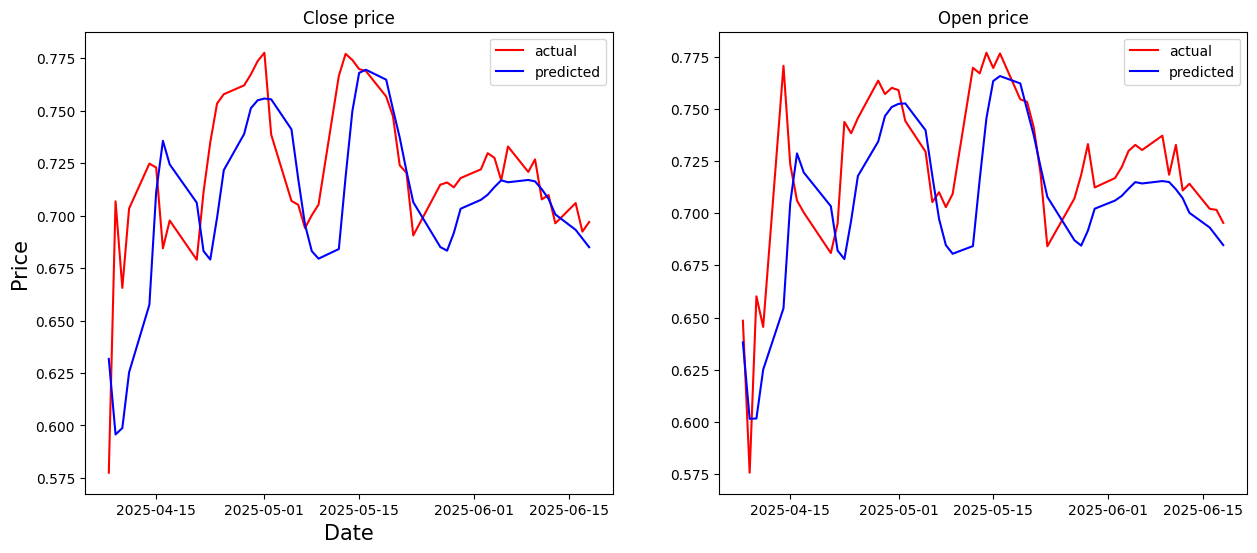

In [196]:
fig, ax = plt.subplots(1,2, figsize = (15,6)) 

ax[0].plot(df_merge['Close'], color = 'red', label = 'actual')
ax[0].plot(df_merge['Predicted Close'], color = 'blue', label = 'predicted')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[0].set_title('Close price')
ax[1].plot(df_merge['Open'], color = 'red', label = 'actual')
ax[1].plot(df_merge['Predicted Open'], color = 'blue', label = 'predicted')
ax[1].legend()
ax[1].set_title('Open price')
fig.savefig("Test data accuracy", dpi=300, bbox_inches='tight')

In [194]:
test_prediction = model.predict(test_seq)
test_prediction = MMS.inverse_transform(test_prediction)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [195]:
df_merge[['Close', 'Open']] = MMS.inverse_transform(df_merge[['Close', 'Open']])
df_merge[['Predicted Close', 'Predicted Open']] = MMS.inverse_transform(df_merge[['Predicted Close', 'Predicted Open']])



In [160]:
df_new = yf.download("AAPL", start="2025-06-20", end="2025-08-10")


[*********************100%***********************]  1 of 1 completed


In [165]:
df_new  = df_new [['Close', 'Open']]
df_new[df_new.columns] = MMS.fit_transform(df_new)
df_new.columns = ['Close', 'Open']

In [169]:
df_merge = pd.concat([df_merge, df_new], axis = 0)

In [166]:
del df_merge

In [170]:
df_merge[-5:]

,Close,Open,Predicted Close,Predicted Open
Date,,,,
2025-08-04,0.104991,0.277556,NaN,NaN
2025-08-05,0.090189,0.228419,NaN,NaN
2025-08-06,0.445783,0.327136,NaN,NaN
2025-08-07,0.679174,0.913679,NaN,NaN
2025-08-08,1.000000,1.000000,NaN,NaN


In [119]:
df_merge['Predicted Close', 'Predicted Open']

KeyError: ('Predicted Close', 'Predicted Open')

In [181]:
start_index = len(df_merge) -35 - 50
k = len(df_merge) -35
for stop_index in range (len(df_merge) - 35, len(df_merge)):
    sequence = np.array(df_merge.iloc[start_index:stop_index])
    reshaped = sequence.reshape(-1,100,2)
    pred = model.predict(reshaped)[0]  # shape (2,)
    df_merge.iloc[k, df_merge.columns.get_loc('Predicted Close')] = pred[0]
    df_merge.iloc[k, df_merge.columns.get_loc('Predicted Open')]  = pred[1]
    start_index += 1
    k += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━

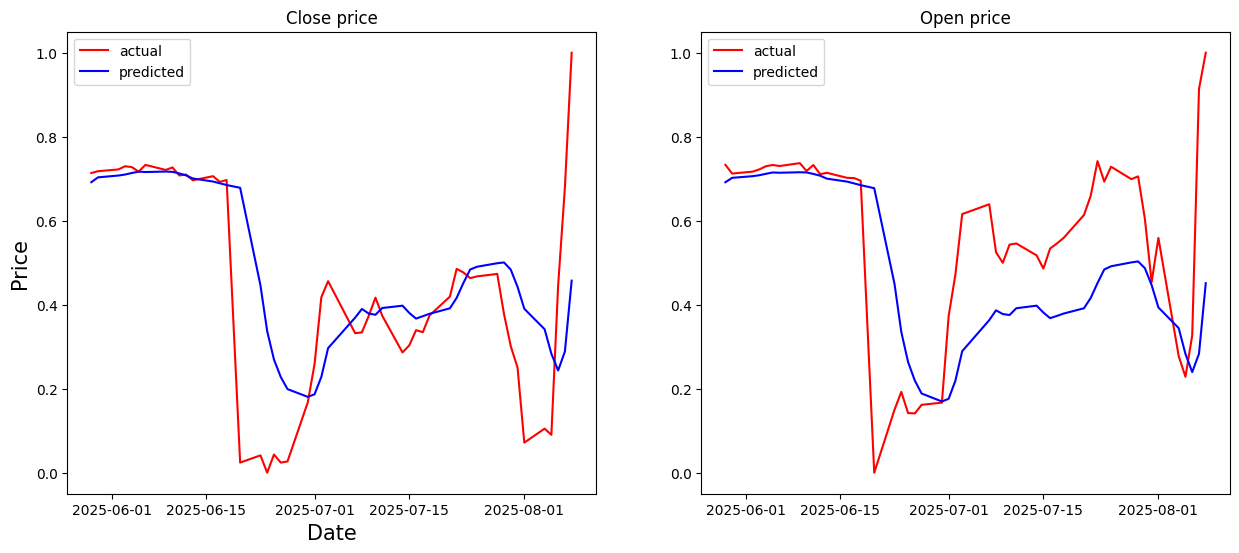

In [182]:
fig, ax = plt.subplots(1,2, figsize = (15,6)) 

ax[0].plot(df_merge['Close'][-50:], color = 'red', label = 'actual')
ax[0].plot(df_merge['Predicted Close'][-50:], color = 'blue', label = 'predicted')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[0].set_title('Close price')
ax[1].plot(df_merge['Open'][-50:], color = 'red', label = 'actual')
ax[1].plot(df_merge['Predicted Open'][-50:], color = 'blue', label = 'predicted')
ax[1].legend()
ax[1].set_title('Open price')
fig.savefig("100 seq2 .png", dpi=300, bbox_inches='tight')


In [191]:
df_merge[['Close', 'Open']] = MMS.inverse_transform(df_merge[['Close', 'Open']])

In [192]:
df_merge[['Predicted Close', 'Predicted Open']] = MMS.inverse_transform(df_merge[['Predicted Close', 'Predicted Open']])

In [179]:
df_merge[-5:]

,Close,Open,Predicted Close,Predicted Open
Date,,,,
2025-08-04,0.104991,0.277556,0.475210,0.469491
2025-08-05,0.090189,0.228419,0.466046,0.460624
2025-08-06,0.445783,0.327136,0.483489,0.477147
2025-08-07,0.679174,0.913679,0.533340,0.526305
2025-08-08,1.000000,1.000000,0.582551,0.575381
